In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [7]:
def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.title("IMAGE")
    plt.axis('off')
    plt.show()

In [8]:
def show_image_comparison(images_with_titles):

    num_images = len(images_with_titles)
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5)) 

    if num_images == 1:
        axes = [axes]
    for i, (img, title) in enumerate(images_with_titles):
        ax = axes[i]
        ax.imshow(img, cmap='gray')
        ax.set_title(title, fontsize=14)
        ax.axis('off') 

    plt.tight_layout() 
    plt.show()

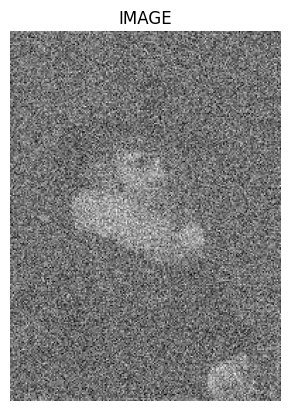

In [9]:
n1 = cv.imread("noisy2.jpg")
n1 = cv.cvtColor(n1,cv.COLOR_BGR2GRAY)
n2 = cv.imread("noise3.jpg")
n2 = cv.cvtColor(n2,cv.COLOR_BGR2GRAY)
show_image(n2)


## Blur 

#### Gaussian Blur

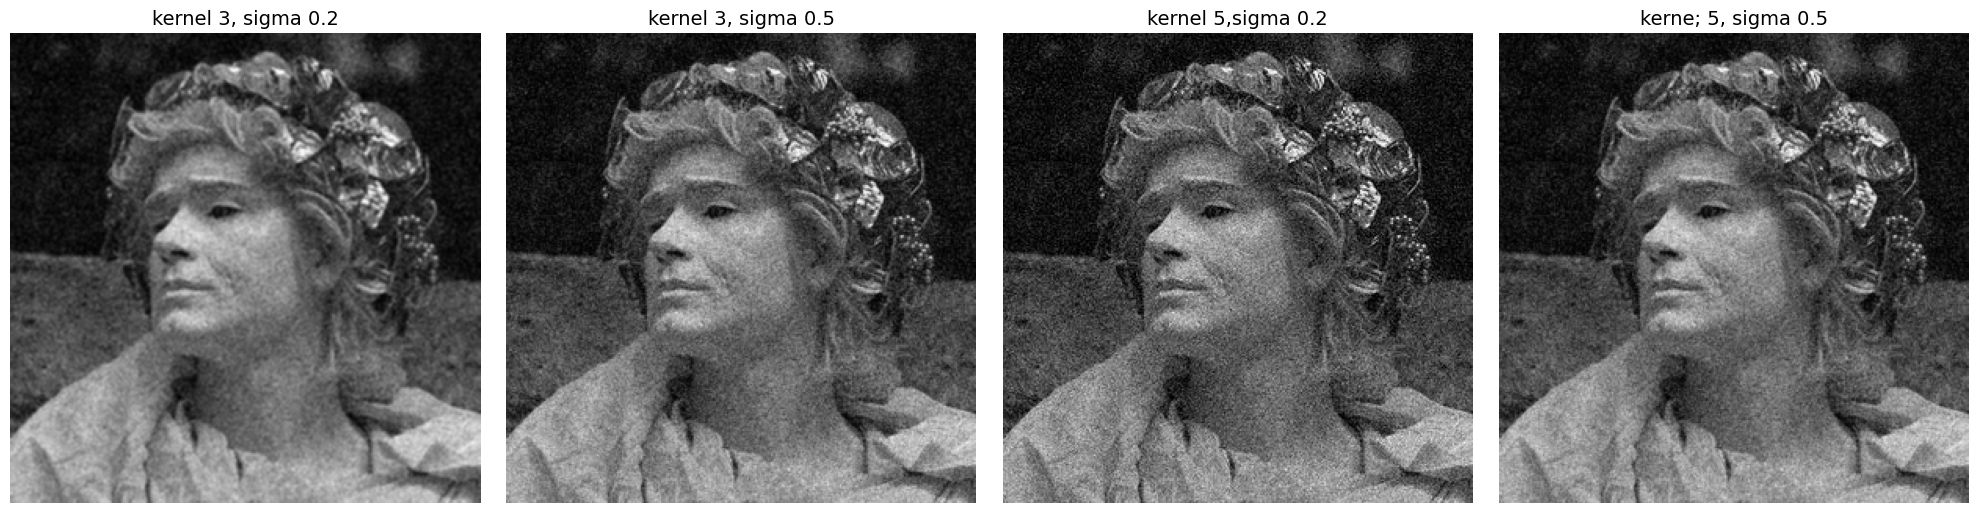

In [10]:
gb1 = cv.GaussianBlur(n1,(3,3),0,2)
gb2 = cv.GaussianBlur(n1,(3,3),0.5)
gb3 = cv.GaussianBlur(n1,(5,5),0.2)
gb4 = cv.GaussianBlur(n1,(5,5),0.5)

gaussian_list = ([(gb1,"kernel 3, sigma 0.2"),(gb2,"kernel 3, sigma 0.5"),(gb3,"kernel 5,sigma 0.2"),(gb4,"kerne; 5, sigma 0.5")])
show_image_comparison(gaussian_list)

#### From stratch of Gaussian Blur

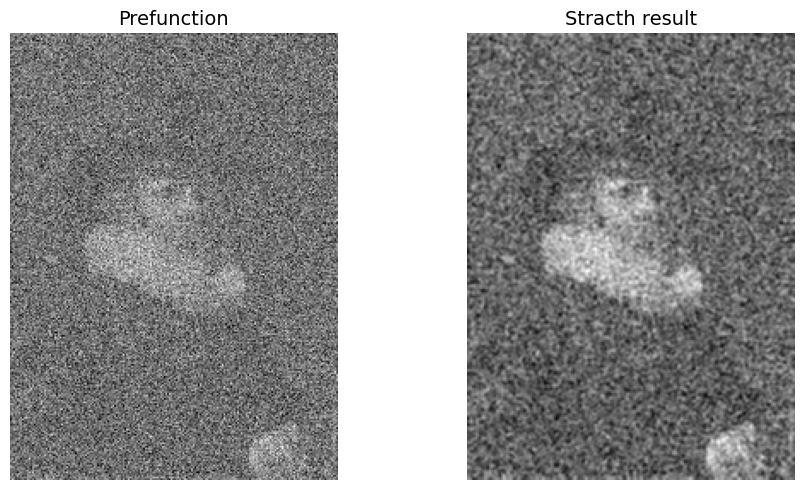

In [11]:
def gaussian(img,k=3):
    k = np.array([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]],dtype="float64")
    out = cv.filter2D(img,-1,k)
    return out

show_image_comparison(([n2,"Prefunction"],[gaussian(n2),"Stracth result"]))

#### Median Blur

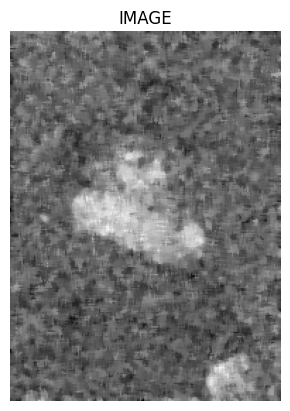

In [12]:
m2 = cv.medianBlur(n2,5)
show_image(m2)

In [19]:
b1 = cv.imread("buildnoise.jpg")
b1 = cv.cvtColor(b1,cv.COLOR_BGR2GRAY)
b1.shape

(338, 401)

#### median from stratch

### Average blur from stratch 

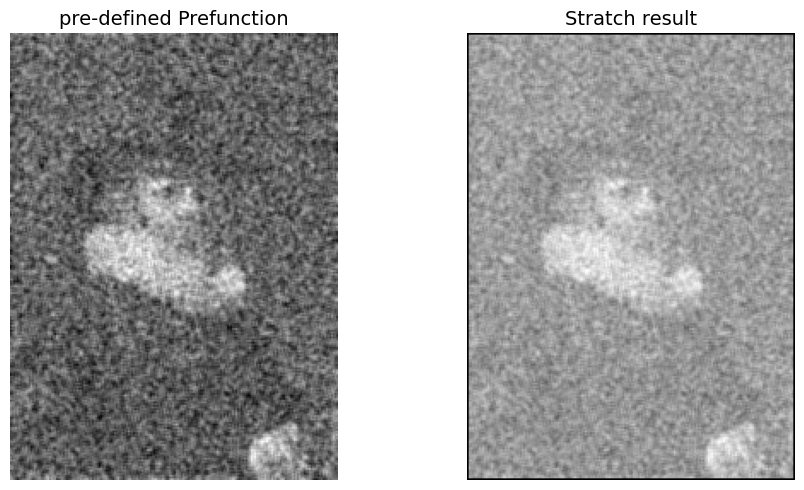

In [ ]:
def average(img,k):
    h,w = img.shape
    outarr = np.zeros((h,w),dtype=img.dtype)
    offset = k//2
    for i in range(offset,h-offset):
        for j in range(offset,w-offset):
            out = img[i-offset:i+offset+1,j-offset:j+offset+1]
            outarr[i,j] = np.mean(out)
    return outarr


show_image_comparison(([cv.blur(n2,(3,3)),"pre-defined Prefunction"],[average(n2,3),"Stratch result"]))

n2 Image  [[117 115  89 128 118 138]
 [ 74 107 156 102 134  84]
 [108 113  82  45 100 115]
 [ 93 143 124  55 111 112]
 [122 117  89  96 156 133]
 [ 74  73  80 140 127  52]]
i= 337 j= 391 offset = 2 Image =  [[62 61 61]] Median = 61.0 
 Result : [1 1 1 1 1 1]
i= 337 j= 392 offset = 2 Image =  [[61 61 62]] Median = 61.0 
 Result : [1 1 1 1 1 1]
i= 337 j= 393 offset = 2 Image =  [[61 62 63]] Median = 62.0 
 Result : [1 1 1 1 1 1]
i= 337 j= 394 offset = 2 Image =  [[62 63 64]] Median = 63.0 
 Result : [1 1 1 1 1 1]
i= 337 j= 395 offset = 2 Image =  [[63 64 56]] Median = 63.0 
 Result : [63  1  1  1  1  1]
i= 337 j= 396 offset = 2 Image =  [[64 56 38]] Median = 56.0 
 Result : [63 56  1  1  1  1]
i= 337 j= 397 offset = 2 Image =  [[ 56  38 114]] Median = 56.0 
 Result : [63 56 56  1  1  1]
i= 337 j= 398 offset = 2 Image =  [[ 38 114  98]] Median = 98.0 
 Result : [63 56 56 98  1  1]
i= 337 j= 399 offset = 2 Image =  [[114  98]] Median = 106.0 
 Result : [ 63  56  56  98 106   1]
i= 337 j= 4

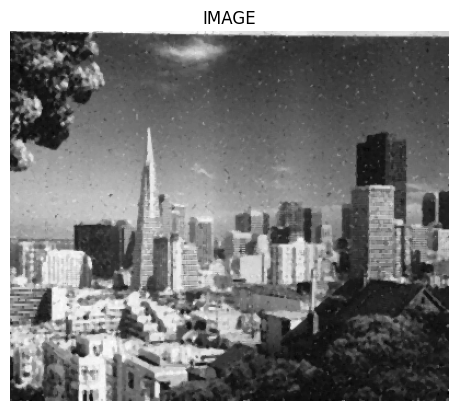

In [59]:
def median(img,k):
    h,w = img.shape
    offset = k//2
    outarr = np.ones((h,w),dtype=img.dtype)
    for i in range(0,h):
        for j in range(0,w):
            out = img[i:i+offset+1,j:j+offset+1]
            outarr[i,j] = np.median(out)
            if ((i==337)and (j >390)):
                print("i=",i,"j=",j,"offset =",offset,"Image = ",img[i:i+offset+1,j:j+offset+1],"Median =",np.median(out),"\n Result :",outarr[337,395:])

    print(outarr.shape)
    return outarr

print("n2 Image ",n2[:6,:6])
#show_image_comparison(([b1,"Original Image"],[cv.medianBlur(b1,3),"pre-defined Prefunction"],[median(b1,11),"Stratch result"]))
show_image(median(b1,5))

In [ ]:
import numpy as np
import cv2 as cv

def create_gaussian_kernel(ksize, sigma):
    """Generates a ksize x ksize Gaussian kernel based on sigma."""
    if ksize % 2 == 0:
        raise ValueError("Kernel size must be odd.")

    center = ksize // 2
    kernel = np.zeros((ksize, ksize), dtype=np.float64)

    for y in range(ksize):
        for x in range(ksize):
            rel_x = x - center
            rel_y = y - center
            
            exponent = -(rel_x**2 + rel_y**2) / (2 * sigma**2)
            kernel[y, x] = np.exp(exponent)
            
    kernel = kernel / np.sum(kernel)
    return kernel

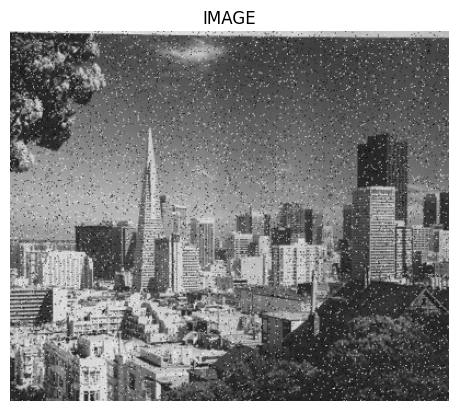

Image 
 [[194 198 202 205 194 162]
 [ 95 109 107  99 104  29]
 [ 50  50  59  41  59  69]
 [ 54  27 163  93  46 148]
 [ 61  60  56  56  69  73]
 [ 34  55  72  67  87 110]]
Gaussian Blur 
 [[146 148 150 148 131 122]
 [115 117 118 116 105 100]
 [ 62  73  82  79  73  79]
 [ 49  64  79  76  74  87]
 [ 52  62  74  75  79  90]
 [ 54  58  64  68  77  94]]


In [66]:
def gaussian_scratch_full(img, ksize=3, sigma=1.0):
    
    if ksize % 2 == 0:
        raise ValueError("Kernel size must be odd.")
        
    kernel = create_gaussian_kernel(ksize, sigma)
    
    h, w = img.shape
    
    res = img.copy().astype(np.float64) 
    

    for i in range(0, h):
        for j in range(0, w):
            
            window = img[i : i + 1, 
                         j : j + 1]
            
            r = np.sum(window * kernel)
            res[i, j] = r
            #if ((i==0)and (j<5)):
                #print("i=",i,"j=",j,"offset =",offset,"Image = ",window,"Gaussian Result =",r,"\n Result :",res[0,:5],"Kernel =",kernel,"Multiplated Result =",window*kernel)

            
    return res.astype(img.dtype)

blur_light = gaussian_scratch_full(b1, ksize=3, sigma=1.0)
show_image(blur_light)
print("Image \n",blur_light[:6,:6])
gr = cv.GaussianBlur(b1,(3,3),1.0)
print("Gaussian Blur \n",gr[:6,:6])

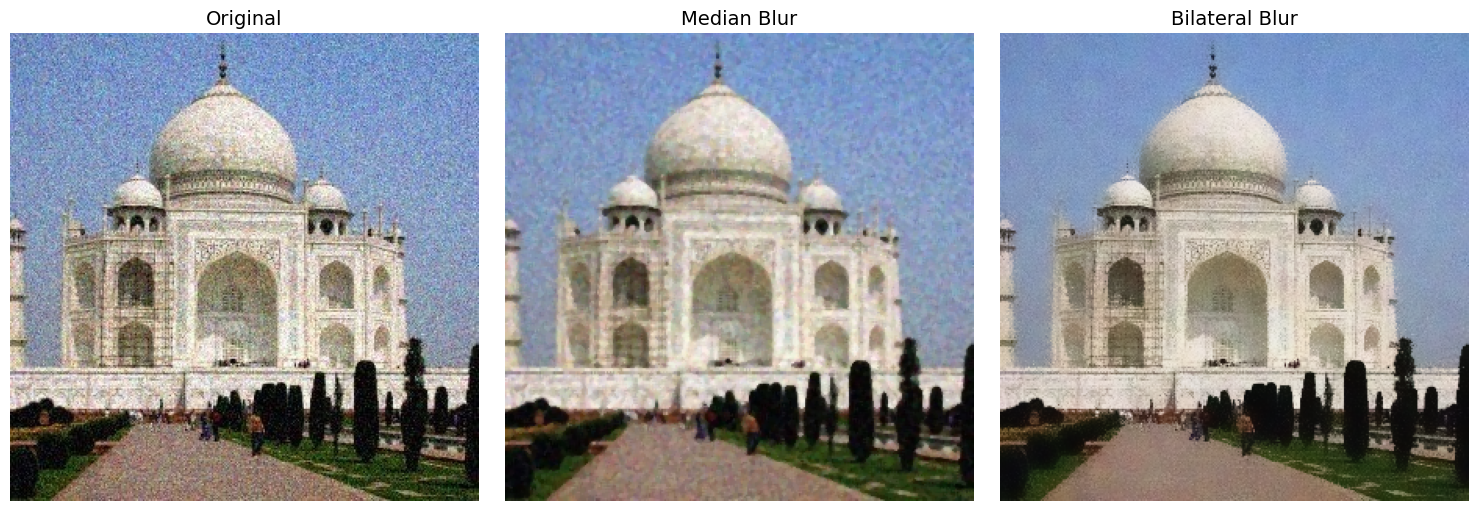

In [78]:

bi1 = cv.imread('taj.jpg')
bi1 = cv.cvtColor(bi1,cv.COLOR_BGR2RGB)
bi2 = cv.bilateralFilter(bi1, 15, 75, 75)
show_image_comparison(([bi1,"Original"],[cv.medianBlur(bi1,3),"Median Blur"],[bi2,"Bilateral Blur"]))


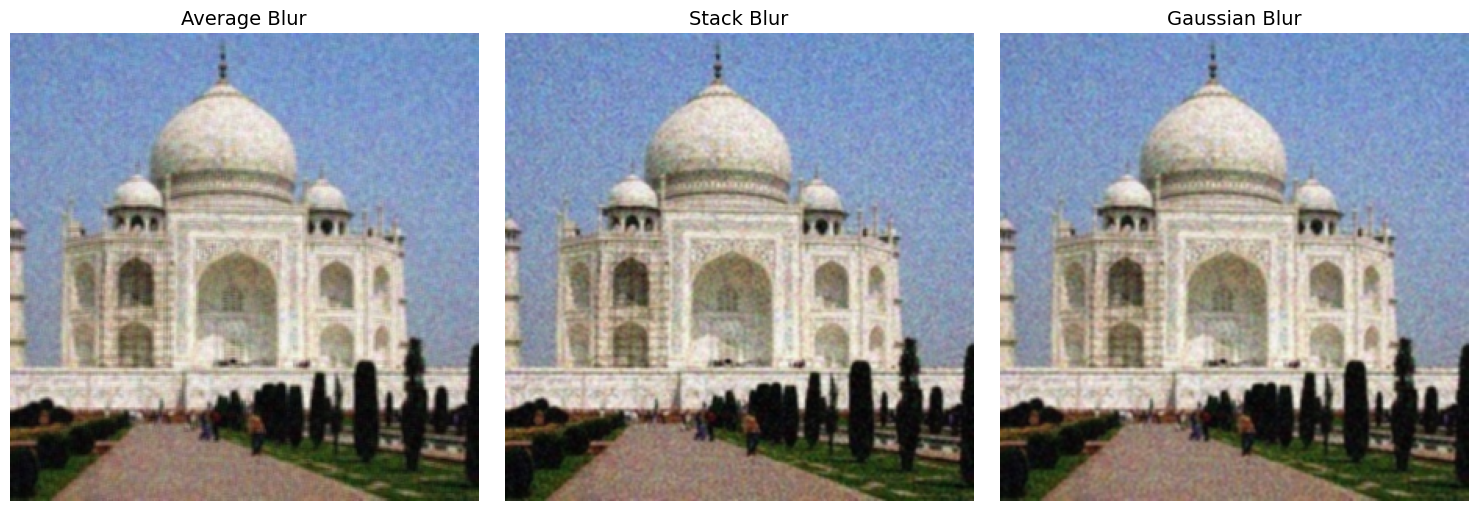

In [77]:
show_image_comparison(([cv.blur(bi1,(3,3)),"Average Blur"],[cv.stackBlur(bi1,(3,3)),"Stack Blur"],[cv.GaussianBlur(bi1,(3,3),1.0),"Gaussian Blur"]))

## Gaussian Based Edge Detection

#### Differences of Gaussian

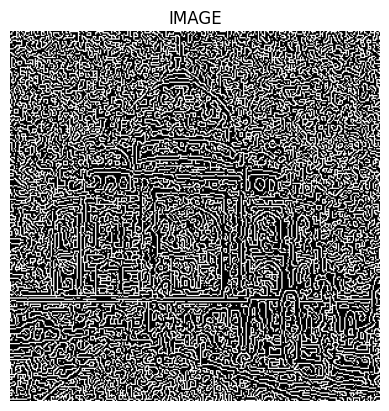

In [135]:
b = cv.cvtColor(bi1,cv.COLOR_RGB2GRAY)
d1 = cv.GaussianBlur(b,(9,9),0.9)
d2 = cv.GaussianBlur(b,(9,9),1.2)

dog = np.subtract(d1,d2)

#show_image(dog)
ret,thresh = cv.threshold(dog,120,180,cv.THRESH_BINARY+ cv.THRESH_OTSU)
can = cv.Canny(thresh,50,150,None,7,False)
show_image(can)


#### Laplacian of Gaussian

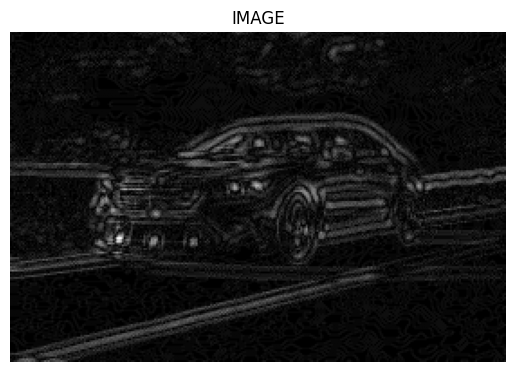

In [171]:
c = cv.GaussianBlur(cv.cvtColor(cv.imread("car.jpg"),cv.COLOR_BGR2GRAY),(7,7),2.0)
c = cv.Laplacian(c,cv.CV_16S,3)           
lap = cv.convertScaleAbs(c,cv.CV_8U)
show_image(lap)